# Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install ydata_profiling

In [30]:
!pip install pmdarima

In [31]:
import pmdarima as pm
from pmdarima import auto_arima

In [5]:
from ydata_profiling import ProfileReport

# Loading the dataset

In [6]:
sales = pd.read_csv("sales.csv")
products = pd.read_csv("products.csv")
stores = pd.read_csv("stores.csv")

# Data Profiling

In [7]:
sales_dataProfiling = ProfileReport(sales, title = "Sales Data Profiling")
sales_dataProfiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
products_dataProfiling = ProfileReport(products, title = "Products Data Profiling")
products_dataProfiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
stores_dataProfiling = ProfileReport(stores, title = "Stores Data Profiling")
stores_dataProfiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Dataset modification

In [10]:
#merging datasets
merged_df = pd.merge(pd.merge(sales, products, how = 'left'), stores, how ='left')

In [11]:
#checking the general overview of the merged dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Sale_ID           829262 non-null  int64 
 1   Date              829262 non-null  object
 2   Store_ID          829262 non-null  int64 
 3   Product_ID        829262 non-null  int64 
 4   Units             829262 non-null  int64 
 5   Product_Name      829262 non-null  object
 6   Product_Category  829262 non-null  object
 7   Product_Cost      829262 non-null  object
 8   Product_Price     829262 non-null  object
 9   Store_Name        829262 non-null  object
 10  Store_City        829262 non-null  object
 11  Store_Location    829262 non-null  object
 12  Store_Open_Date   829262 non-null  object
dtypes: int64(4), object(9)
memory usage: 82.2+ MB


In [12]:
#replacing special characters in cost and price
merged_df['Product_Price'] = merged_df['Product_Price'].str.replace('[\$,]', '', regex=True)
merged_df['Product_Cost'] = merged_df['Product_Cost'].str.replace('[\$,]', '', regex=True)

In [14]:
#changing data types
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Product_Cost'] = pd.to_numeric(merged_df['Product_Cost'])
merged_df['Product_Price'] = pd.to_numeric(merged_df['Product_Price'])
merged_df['Store_Open_Date'] = pd.to_datetime(merged_df['Store_Open_Date'])

In [15]:
#adding new columns
merged_df['Sales'] = merged_df['Units'] * merged_df['Product_Price']
merged_df['Profit'] = merged_df['Sales'] - (merged_df['Units'] * merged_df['Product_Cost'])

# Exploratory data analysis

In [18]:
#find top 10 profitable products
top_10_products = merged_df.groupby('Product_Name')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False).head(10)
top_10_products

Product_Name    Profit
5         Colorbuds  834944.0
0     Action Figure  347748.0
17      Lego Bricks  298685.0
7     Deck Of Cards  252102.0
13    Glass Marbles  187590.0
2   Barrel O' Slime  183326.0
16  Kids Makeup Kit  146598.0
23         Nerf Gun  132715.0
6          Dart Gun  126352.0
10    Etch A Sketch  121680.0

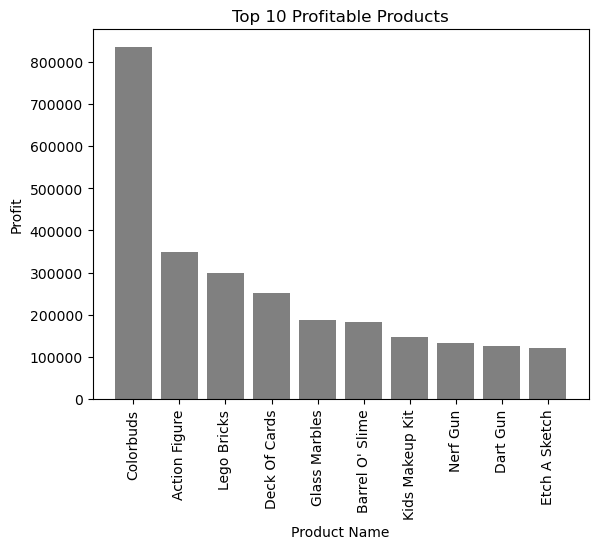

In [19]:
#plot the graph of top 10 profitable products
%matplotlib inline
plt.bar(top_10_products['Product_Name'], top_10_products['Profit'], color ='grey')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.title('Top 10 Profitable Products')
plt.xticks(rotation=90)
plt.show()

In [20]:
#find profitable product category
products_category = merged_df.groupby('Product_Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
products_category

Product_Category     Profit
4               Toys  1079527.0
1        Electronics  1001437.0
0       Art & Crafts   753354.0
2              Games   673993.0
3  Sports & Outdoors   505718.0

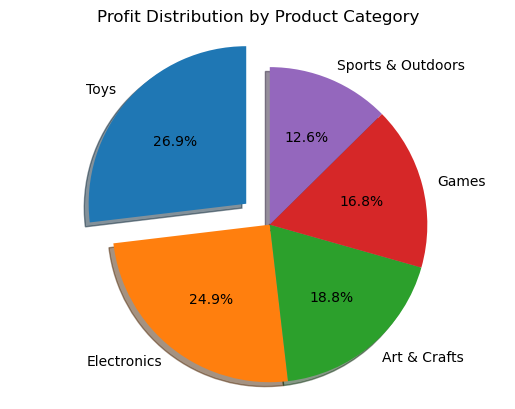

In [21]:
#plot the pie chart of profitable product category
plt.pie(products_category['Profit'], labels = products_category['Product_Category'], autopct='%1.1f%%', startangle=90, explode = [0.2,0,0,0,0], shadow = True)
plt.title('Profit Distribution by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [22]:
#find 5 most revenue earned stores
top_5_stores_revenue = merged_df.groupby('Store_Name')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False).head(5)
top_5_stores_revenue

Store_Name      Sales
9   Maven Toys Ciudad de Mexico 2  554553.43
17       Maven Toys Guadalajara 3  449354.91
8   Maven Toys Ciudad de Mexico 1  433556.21
43            Maven Toys Toluca 1  411157.32
30         Maven Toys Monterrey 2  372998.82

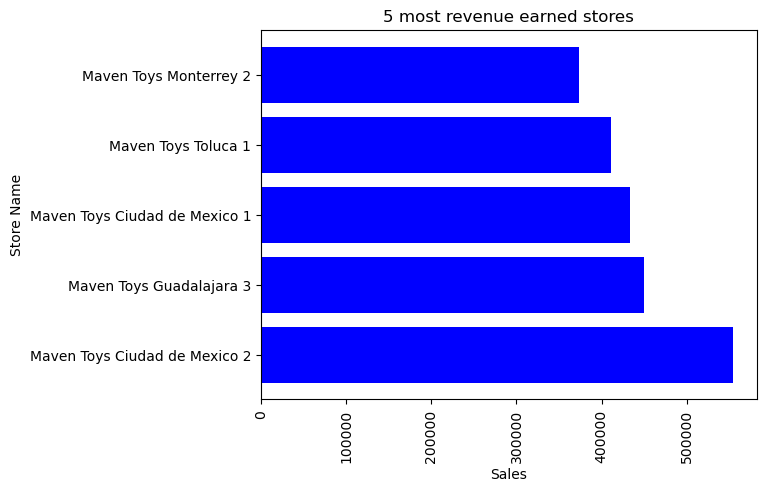

In [23]:
#plot horizontal bar graph of 5 most revenue earned stores
plt.barh(top_5_stores_revenue['Store_Name'], top_5_stores_revenue['Sales'], color ='blue')
plt.xlabel('Sales')
plt.ylabel('Store Name')
plt.title('5 most revenue earned stores')
plt.xticks(rotation=90)
plt.show()

In [24]:
#find 5 most profitable stores
top_5_stores_profit = merged_df.groupby('Store_Name')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False).head(5)
top_5_stores_profit

Store_Name    Profit
9   Maven Toys Ciudad de Mexico 2  169856.0
17       Maven Toys Guadalajara 3  121571.0
8   Maven Toys Ciudad de Mexico 1  111296.0
30         Maven Toys Monterrey 2  106783.0
43            Maven Toys Toluca 1  104612.0

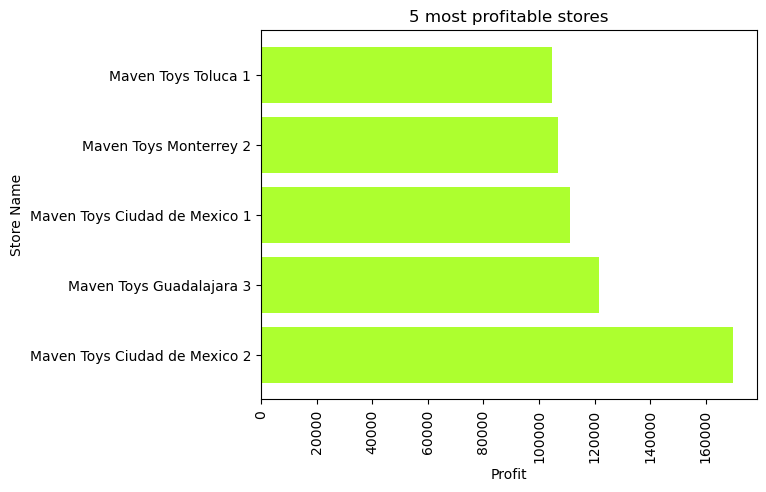

In [25]:
#plot horizontal bar graph of 5 most profitable stores
plt.barh(top_5_stores_profit['Store_Name'], top_5_stores_profit['Profit'], color ='greenyellow')
plt.xlabel('Profit')
plt.ylabel('Store Name')
plt.title('5 most profitable stores')
plt.xticks(rotation=90)
plt.show()

# Plotting the time series graph

In [26]:
#create a new data frame with Date and Sales by grouping with month
new_df = merged_df[['Date', 'Sales']].copy()
new_df['Year'] = new_df['Date'].dt.year
new_df['Month'] = new_df['Date'].dt.month

new_df = new_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
new_df['Year_Month'] = new_df['Year'].astype(str) + '-' + new_df['Month'].astype(str)
new_df.drop(['Year', 'Month'], axis=1, inplace=True)
new_df = new_df[['Year_Month', 'Sales']]
new_df

Year_Month      Sales
0      2017-1  542554.91
1      2017-2  541351.65
2      2017-3  589485.19
3      2017-4  681072.98
4      2017-5  672369.90
5      2017-6  661980.22
6      2017-7  556034.23
7      2017-8  489422.73
8      2017-9  585844.04
9     2017-10  623874.39
10    2017-11  661304.15
11    2017-12  877203.69
12     2018-1  747196.22
13     2018-2  722632.19
14     2018-3  883515.64
15     2018-4  827691.07
16     2018-5  825319.49
17     2018-6  808299.25
18     2018-7  828348.86
19     2018-8  660877.07
20     2018-9  658194.48

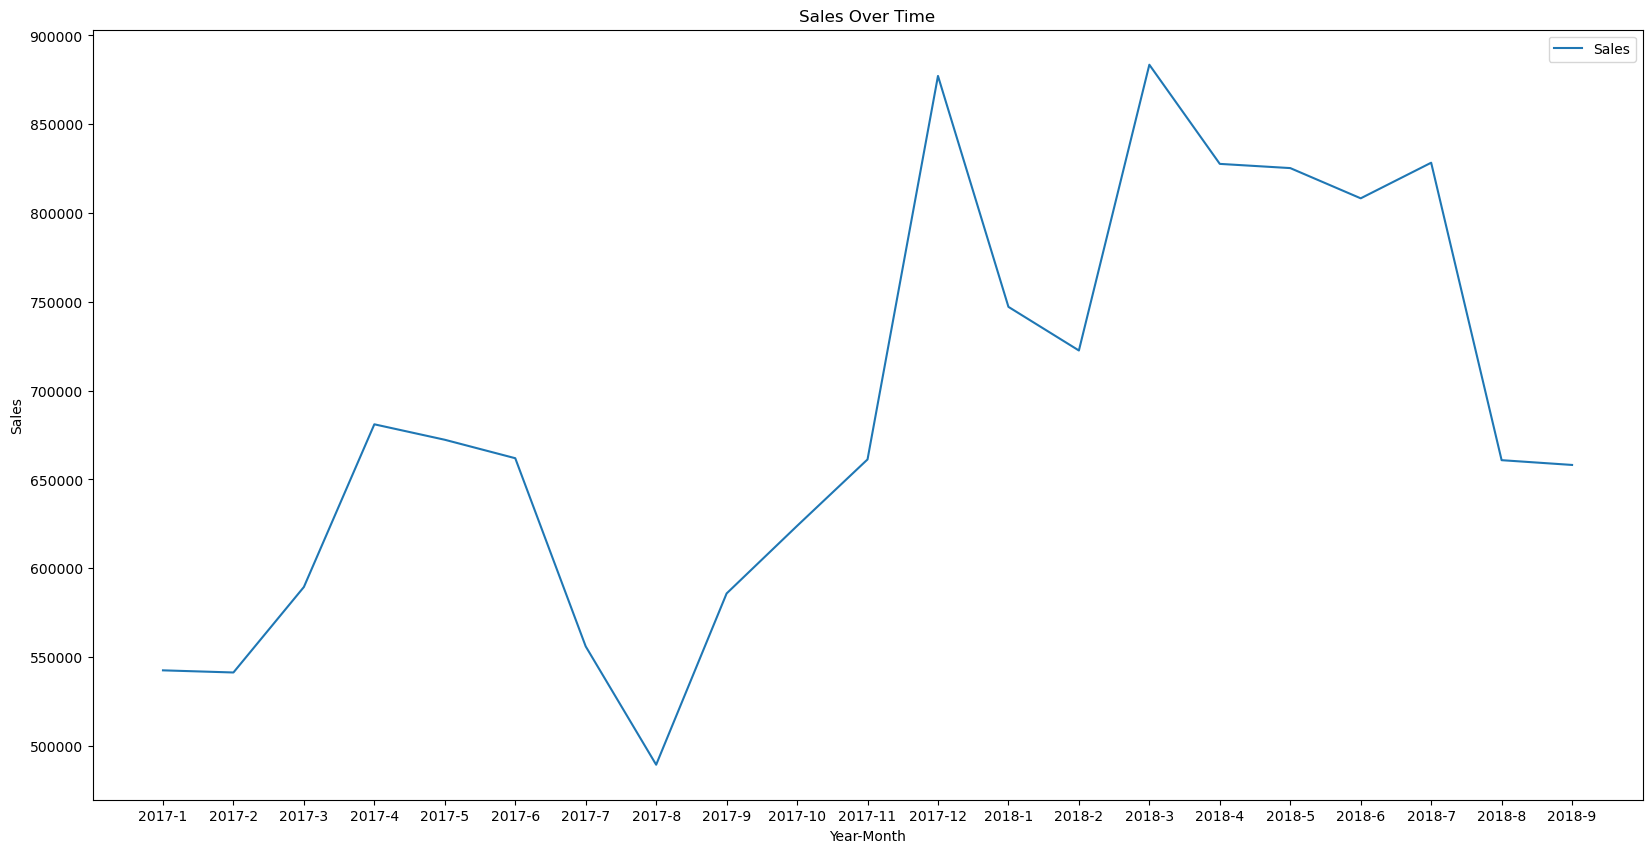

In [27]:
#plot the actual time series data
plt.figure(figsize=(20, 10))
plt.plot(new_df['Year_Month'], new_df['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Finding Trend, Seasonality, and Residuals

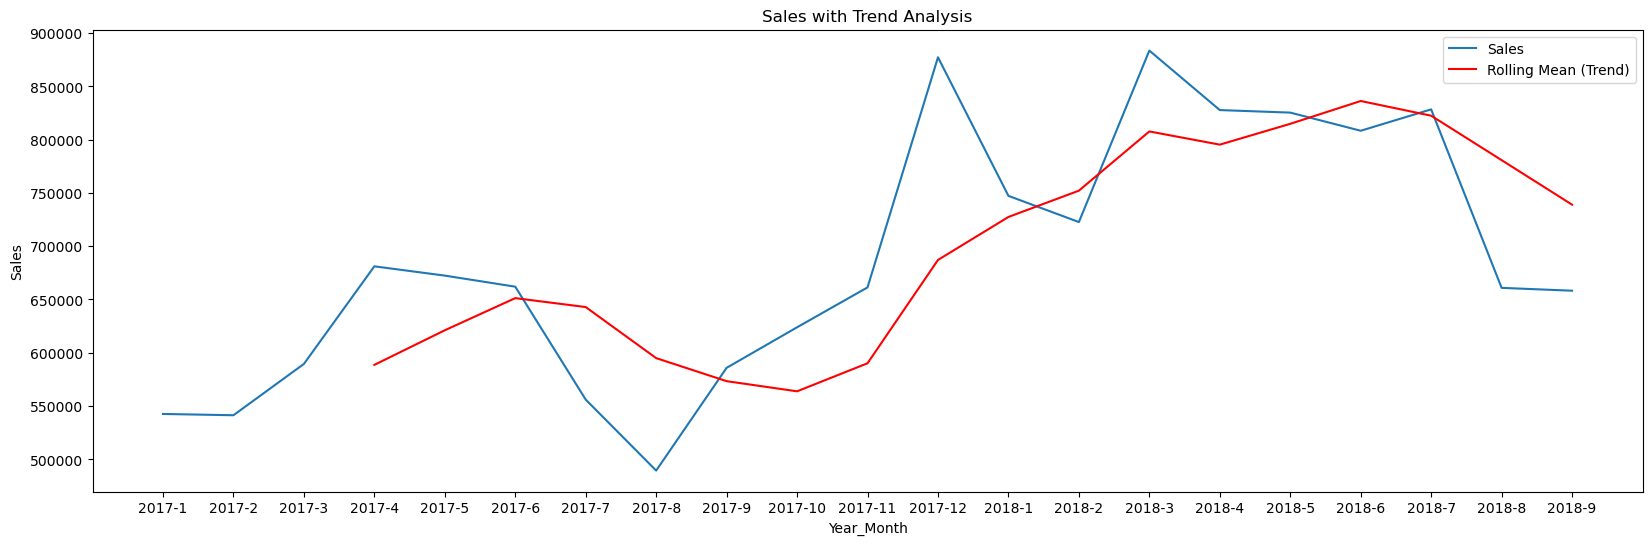

In [28]:
#plot rolling mean 
rolling_mean = new_df['Sales'].rolling(window=4).mean()
rolling_mean

plt.figure(figsize=(20, 6))
plt.plot(new_df['Year_Month'], new_df['Sales'], label='Sales')
plt.plot(rolling_mean, label='Rolling Mean (Trend)', color='red')
plt.title('Sales with Trend Analysis')
plt.xlabel('Year_Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

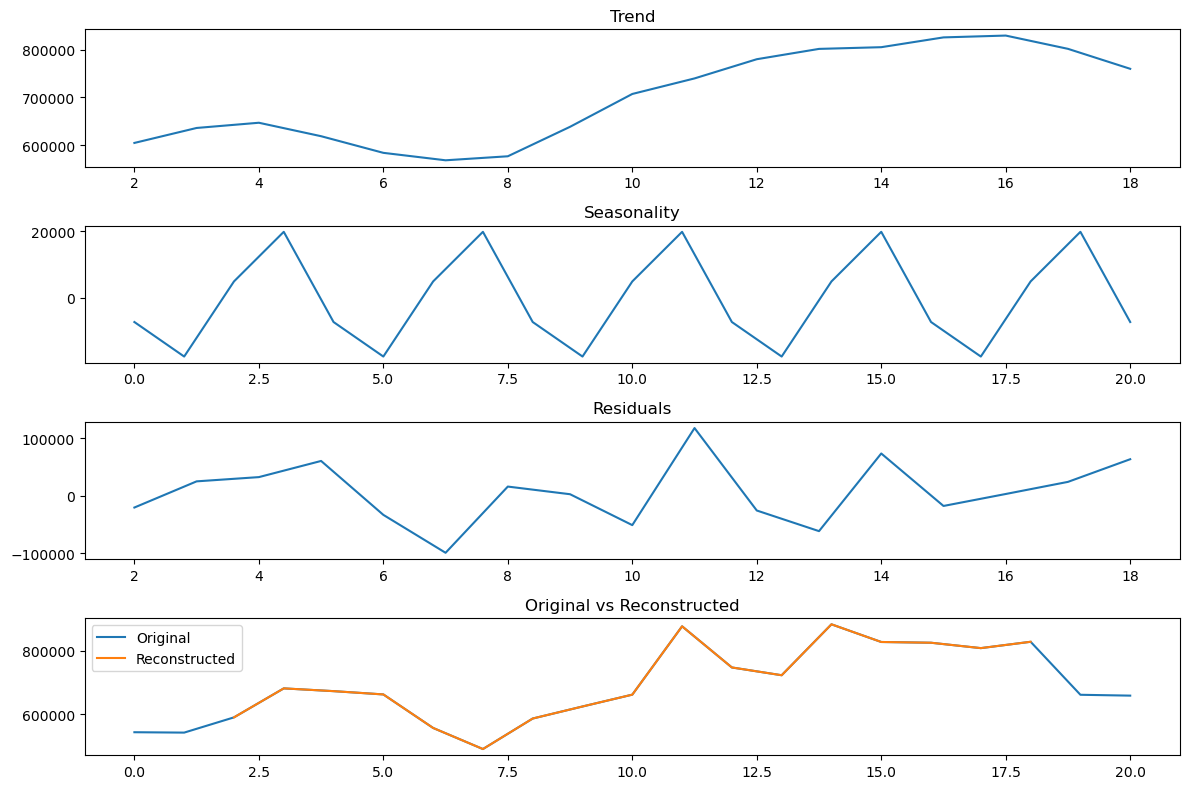

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
result = seasonal_decompose(new_df['Sales'], model='additive', period=4)

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(new_df['Sales'], label='Original')
plt.plot(result.trend + result.seasonal + result.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

# Time series forecast of sales

In [32]:
# Fit an auto ARIMA model
model = auto_arima(new_df['Sales'], seasonal=True, m=12, trace=True)
print(model.summary())

C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (9) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "


Performing stepwise search to minimize aic


C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,2)(1,1,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "C:\Users\ammra\AppData\Local\anaconda3\Lib\si

 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=228.706, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=232.366, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=232.913, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=251.011, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=230.697, Time=0.07 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=230.687, Time=0.03 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=231.965, Time=0.20 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=232.245, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=231.591, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 1.293 seconds
                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                   21
Model:             SARIMAX(0, 1, 0, 12)   L

In [33]:
#split the dataset into train data and test data
train_size = int(len(new_df) * 0.8)  # 80% for training, 20% for testing
train, test = new_df[:train_size], new_df[train_size:]

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


order = (0, 1, 0)  # Non-seasonal orders
seasonal_order = (0, 1, 0, 12)  # Seasonal orders

# Fit SARIMA model on the training data
sarima_model = SARIMAX(train['Sales'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

In [35]:
# Forecast future values on the test set
forecast_steps = len(test)
forecast_results = sarima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_results.predicted_mean
forecast_values

16    818987.99
17    808598.31
18    702652.32
19    636040.82
20    732462.13
Name: predicted_mean, dtype: float64

In [36]:
from sklearn.metrics import mean_squared_error

#calculate Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(test['Sales'], forecast_values)
print('Mean Squared Error:', mse)

#calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Sales'], forecast_values)
print('Mean Absolute Error:', mae)

Mean Squared Error: 4394464129.538042
Mean Absolute Error: 46286.2


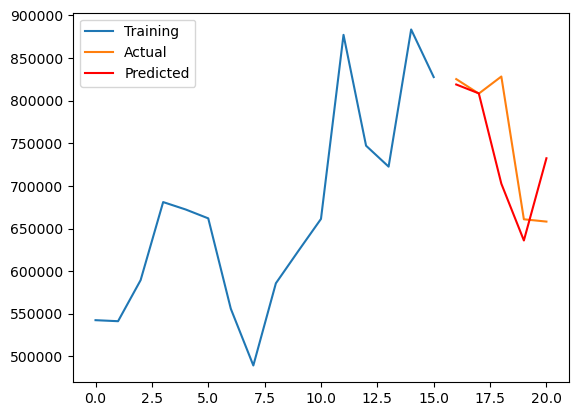

In [39]:
# Plot the original data, predicted values, and confidence intervals
plt.plot(train.index, train['Sales'], label='Training')
plt.plot(test.index, test['Sales'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Predicted', color='red')
plt.legend()
plt.show()